## Hotel Booking Prediction and EDA
##### This is an Exploratory data analysis of a hotel data and a booking prediction model of hotel's bookings.


We are importing the necessary python libraries and modules required to do this prediction and EDA.



In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Now we will import the data, this data is also uploaded on my github profile
[Link to the data set](https://github.com/AMAN1011011/Data-science-case-Studies/tree/main/Hotel%20Booking%20Prediction.md/Data.md)

In [2]:
#importing data from github data repository(form of link)
df=pd.read_csv('https://raw.githubusercontent.com/AMAN1011011/Data-science-case-Studies/main/Hotel%20Booking%20Prediction.md/Data.md/hotel_bookings.csv')

In [3]:
#Sample of data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
#Size of the data
df.shape

(119390, 32)

In [5]:
#Data types of the data set
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df2=df.copy()
len (df2.columns)

32

### PRE PROCESSING OF THE DATA
##### Checking out the count and percentage of missing values

In [9]:
df2.isnull().agg('sum').sort_values(ascending=False)[:5]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
dtype: int64

In [10]:
#Percentage values
df2.isnull().agg('sum').sort_values(ascending=False)[:5]/df2.shape[0]

company               0.943069
agent                 0.136862
country               0.004087
children              0.000034
reserved_room_type    0.000000
dtype: float64

##### There are 4 columns with missing values

In [11]:
df2[df2.company.notna()]['company']

18        110.0
218       110.0
219       110.0
220       110.0
295       113.0
          ...  
119119    451.0
119122    451.0
119123    451.0
119124     72.0
119248    485.0
Name: company, Length: 6797, dtype: float64

In [12]:
(df2.company.notna().sum()/df2.shape[0])*100

5.693106625345506

In [13]:
df2=df2.drop('company',axis=1)

In [14]:
df2[df2.agent.notna()]['agent']

3         304.0
4         240.0
5         240.0
7         303.0
8         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 103050, dtype: float64

In [15]:
df2.agent.notna().sum()/df2.shape[0]

0.8631376162157635

##### Since it is making 86% of the data set we will not be dropping.
##### Missing values can be filled by the mode of the data set of same column

In [16]:
mode=df2.agent.mode()[0]

df2.agent = df2.agent.fillna(mode,)

In [17]:
df.agent.unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [18]:
df2.country.unique()
df2.country.notna().sum()/df2.shape[0]

0.9959125554904096

As less than 1% of the record is missing we will replace it by the mode

In [19]:
df2.country.mode()[0]

'PRT'

In [20]:
mode=df2.country.mode()[0]
df2.country = df2.country.fillna(mode,)

In [21]:
df2.children.isna().sum()

4

In [22]:
df2.dropna(inplace=True)
df2.children.isna().sum()

0

In [23]:
df2.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [24]:
df2.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.370395,104.014801,2016.156593,27.165003,15.798553,0.927605,2.500310,1.856390,0.103890,0.007949,0.031913,0.087121,0.137102,0.221131,76.062285,2.321227,101.833541,0.062520,0.571340
std,0.482913,106.863286,0.707456,13.605334,8.780783,0.998618,1.908289,0.579261,0.398561,0.097438,0.175770,0.844350,1.497462,0.652315,106.324303,17.595011,50.534664,0.245295,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.590000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [25]:
df2[(df2['adults']+df2['children']+df2['babies']+df2['is_canceled'])==0][['adults','children','babies','is_canceled']].head()

,adults,children,babies,is_canceled
2224,0,0.0,0,0
2409,0,0.0,0,0
3181,0,0.0,0,0
3684,0,0.0,0,0
3708,0,0.0,0,0


Inconsistency can be seen above, so we have to fix it.

In [26]:
df2=df2.loc[~((df2['adults']+df2['children']+df2['babies']+df2['is_canceled'])==0)]

In [27]:
df2.shape

(119231, 31)

In [28]:
df2[df2.adr<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,2,No Deposit,273.0,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [29]:
df2=df2.loc[df2.adr>=0]

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119230 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119230 non-null  object 
 1   is_canceled                     119230 non-null  int64  
 2   lead_time                       119230 non-null  int64  
 3   arrival_date_year               119230 non-null  int64  
 4   arrival_date_month              119230 non-null  object 
 5   arrival_date_week_number        119230 non-null  int64  
 6   arrival_date_day_of_month       119230 non-null  int64  
 7   stays_in_weekend_nights         119230 non-null  int64  
 8   stays_in_week_nights            119230 non-null  int64  
 9   adults                          119230 non-null  int64  
 10  children                        119230 non-null  float64
 11  babies                          119230 non-null  int64  
 12  meal            

In [31]:
def change_dtype(df,col_name, type_to_convert):
  df[col_name]=df[col_name].astype(type_to_convert)

In [32]:
obj_cols_to_change_types = ['hotel','is_canceled','meal','country','market_segment','distribution_channel','deposit_type','customer_type','reservation_status','assigned_room_type','reserved_room_type']
for i in obj_cols_to_change_types:
  change_dtype(df2, i, 'category')

In [33]:
change_dtype(df2,'arrival_date_month','category')

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119230 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119230 non-null  category
 1   is_canceled                     119230 non-null  category
 2   lead_time                       119230 non-null  int64   
 3   arrival_date_year               119230 non-null  int64   
 4   arrival_date_month              119230 non-null  category
 5   arrival_date_week_number        119230 non-null  int64   
 6   arrival_date_day_of_month       119230 non-null  int64   
 7   stays_in_weekend_nights         119230 non-null  int64   
 8   stays_in_week_nights            119230 non-null  int64   
 9   adults                          119230 non-null  int64   
 10  children                        119230 non-null  float64 
 11  babies                          119230 non-null  int64   
 12  me

In [35]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,119230.0,104.106517,106.880056,0.0,18.0,69.00,161.0,737.0
arrival_date_year,119230.0,2016.156555,0.707446,2015.0,2016.0,2016.00,2017.0,2017.0
arrival_date_week_number,119230.0,27.163004,13.601492,1.0,16.0,28.00,38.0,53.0
arrival_date_day_of_month,119230.0,15.798138,8.780809,1.0,8.0,16.00,23.0,31.0
stays_in_weekend_nights,119230.0,0.927007,0.995118,0.0,0.0,1.00,2.0,19.0
stays_in_week_nights,119230.0,2.499035,1.897263,0.0,1.0,2.00,3.0,50.0
adults,119230.0,1.858802,0.575757,0.0,2.0,2.00,2.0,55.0
children,119230.0,0.104026,0.398804,0.0,0.0,0.00,0.0,10.0
babies,119230.0,0.007959,0.097501,0.0,0.0,0.00,0.0,10.0
is_repeated_guest,119230.0,0.031502,0.174671,0.0,0.0,0.00,0.0,1.0


Axes(0.125,0.11;0.775x0.77)


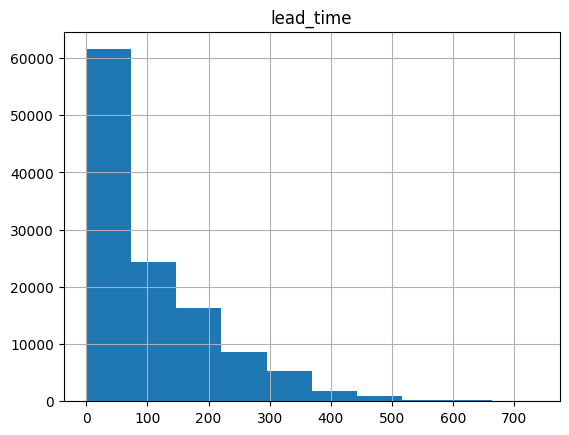

Axes(0.125,0.11;0.775x0.77)


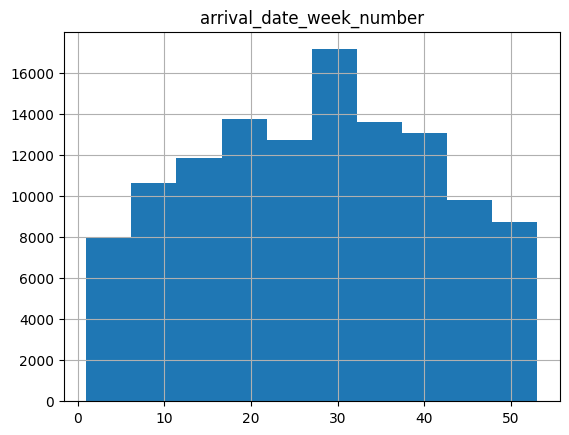

Axes(0.125,0.11;0.775x0.77)


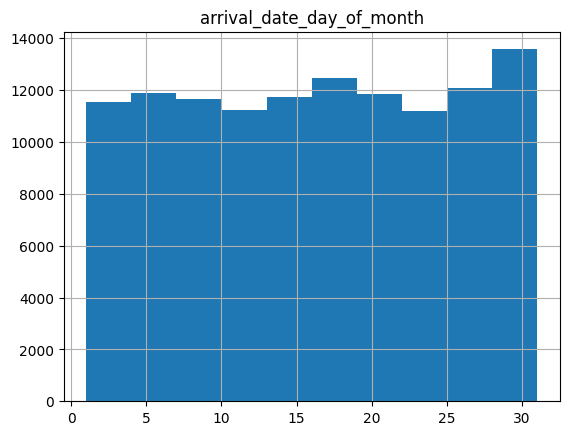

Axes(0.125,0.11;0.775x0.77)


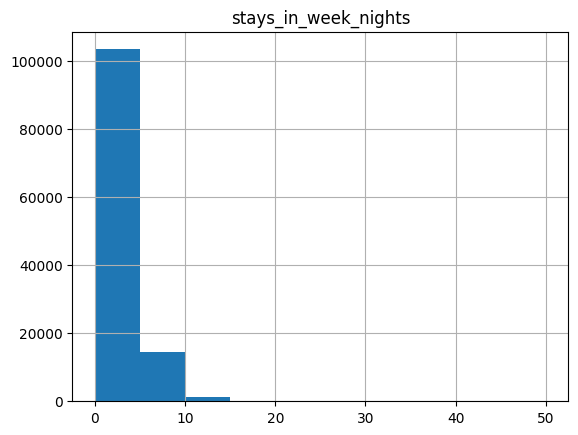

Axes(0.125,0.11;0.775x0.77)


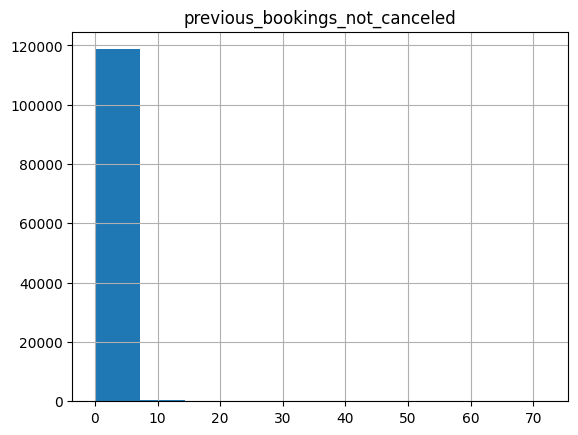

Axes(0.125,0.11;0.775x0.77)


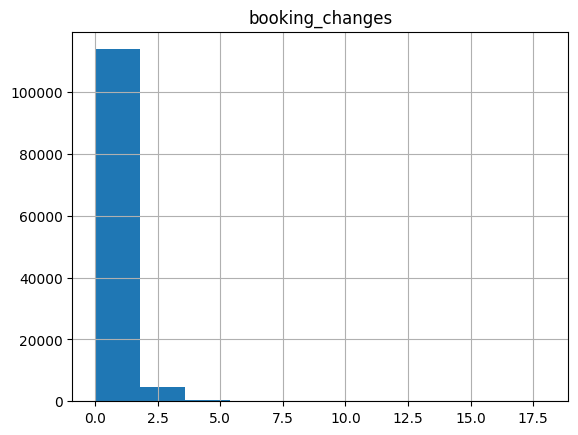

Axes(0.125,0.11;0.775x0.77)


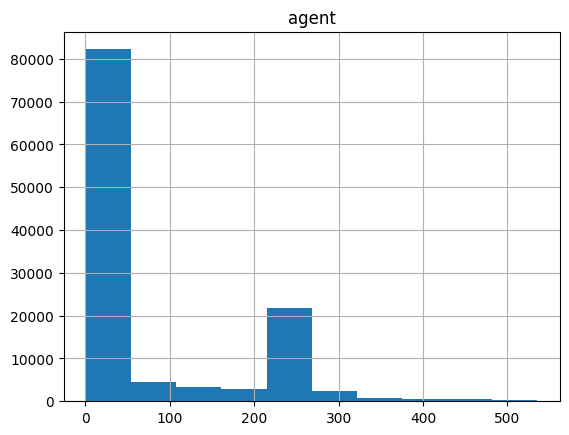

Axes(0.125,0.11;0.775x0.77)


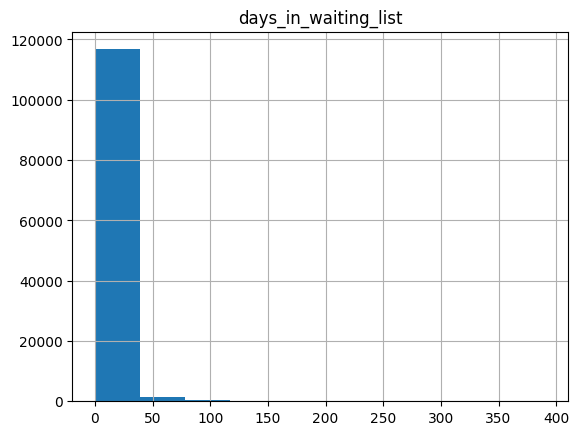

Axes(0.125,0.11;0.775x0.77)


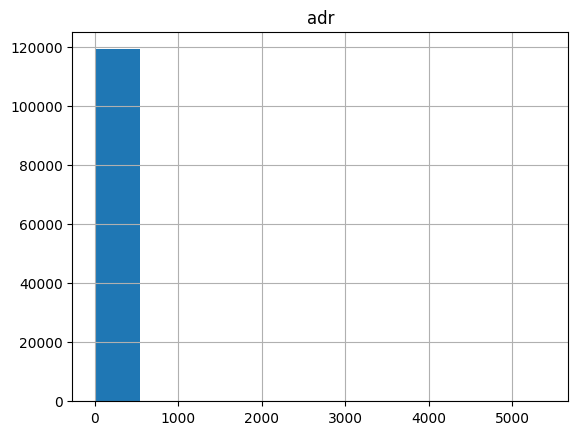

In [36]:
cols=df2.describe().columns.to_list()
for i in cols:
    if df[i].nunique()>20:
        print(df2[i].hist())
        plt.title(i)
        plt.show()

In [37]:
df2.loc [df2.lead_time>600,'lead_time']=500

In [38]:
df2.lead_time.mean()

103.96266879141156

In [39]:
df2.loc[df2['stays_in_week_nights']>15,'stays_in_week_nights']=10

In [40]:
df2.loc[df2.days_in_waiting_list>100, 'days_in_waiting_list']=int(df2.days_in_waiting_list.mean())

In [41]:
df2.loc[df2.adr>500, 'adr'] = 500

In [42]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lead_time,119230.0,103.962669,106.265344,0.0,18.0,69.00,161.0,594.0
arrival_date_year,119230.0,2016.156555,0.707446,2015.0,2016.0,2016.00,2017.0,2017.0
arrival_date_week_number,119230.0,27.163004,13.601492,1.0,16.0,28.00,38.0,53.0
arrival_date_day_of_month,119230.0,15.798138,8.780809,1.0,8.0,16.00,23.0,31.0
stays_in_weekend_nights,119230.0,0.927007,0.995118,0.0,0.0,1.00,2.0,19.0
stays_in_week_nights,119230.0,2.485440,1.793938,0.0,1.0,2.00,3.0,15.0
adults,119230.0,1.858802,0.575757,0.0,2.0,2.00,2.0,55.0
children,119230.0,0.104026,0.398804,0.0,0.0,0.00,0.0,10.0
babies,119230.0,0.007959,0.097501,0.0,0.0,0.00,0.0,10.0
is_repeated_guest,119230.0,0.031502,0.174671,0.0,0.0,0.00,0.0,1.0


### VIsualizing the data set

<ipython-input-43-722c54e788dd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()


<Axes: >

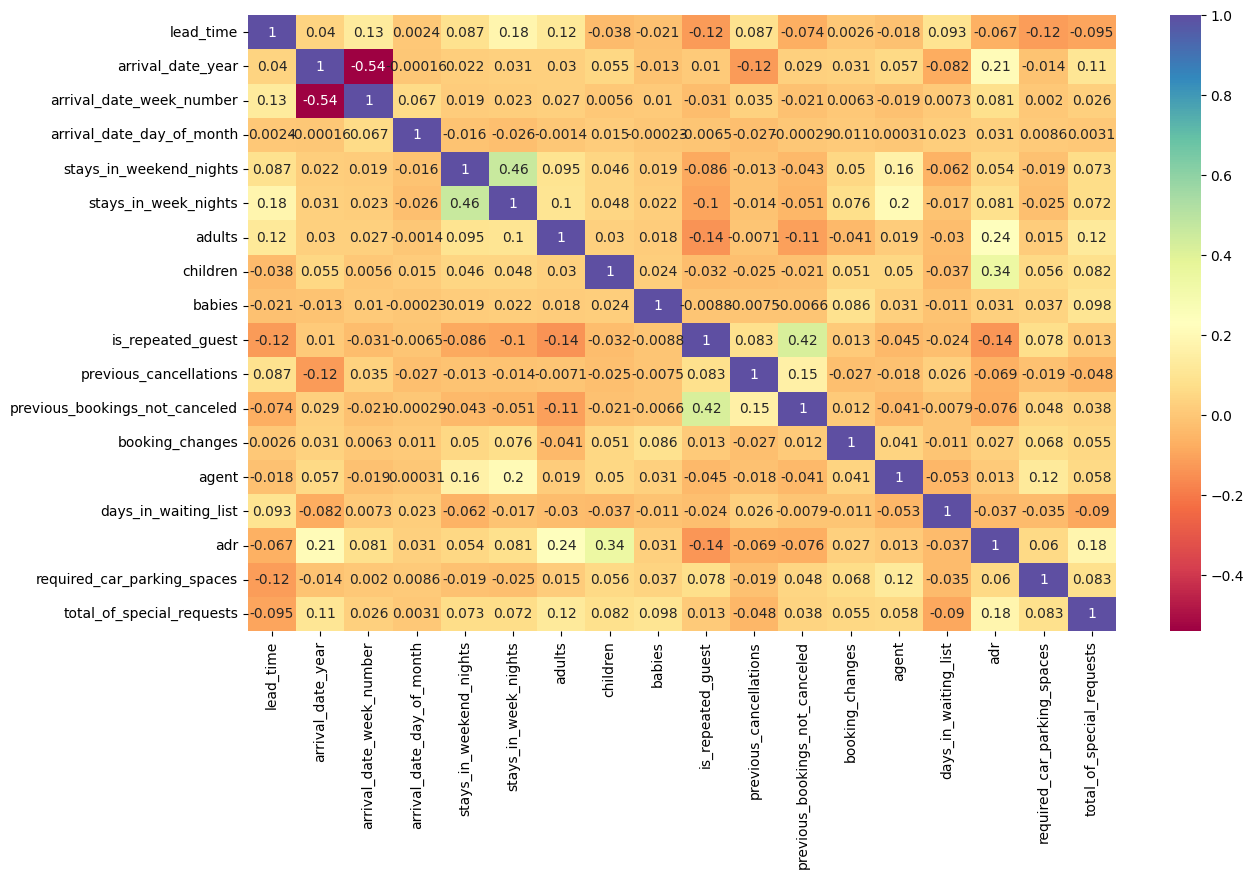

In [43]:
plt.figure(figsize=(14, 8))
corr = df2.corr()
sns.heatmap(corr, annot=True,cmap='Spectral')

In [44]:
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,...,4,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [45]:
df2['hotel'].value_counts()

City Hotel      79182
Resort Hotel    40048
Name: hotel, dtype: int64

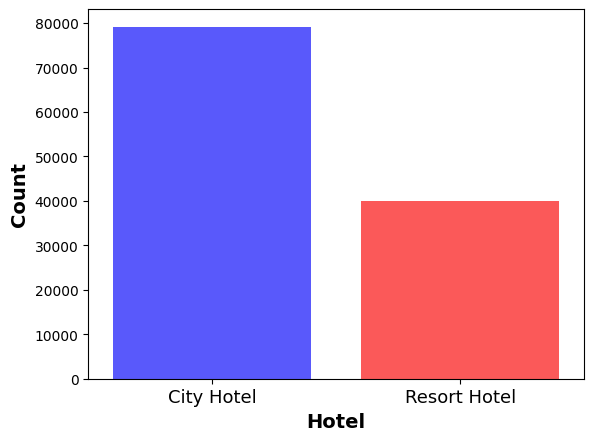

In [46]:
ax = sns.countplot(x='hotel', data=df2, order=['City Hotel', 'Resort Hotel'], saturation=0.95, palette='seismic')
plt.xlabel('Hotel',fontsize=14,weight='bold')
plt.ylabel('Count',fontsize=14,weight='bold')
plt.xticks(fontsize=13)
plt.yticks()
plt.show()

In [47]:
pd.crosstab(df2['hotel'], df2['is_canceled']).T

hotel,City Hotel,Resort Hotel
is_canceled,,
0,46084,28926
1,33098,11122


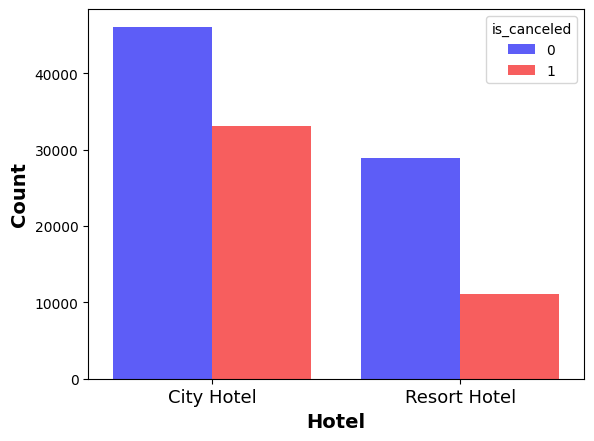

In [48]:
ax = sns.countplot(x='hotel', data=df2, hue='is_canceled',order=['City Hotel', 'Resort Hotel'], saturation=0.90, palette='seismic')
plt.xlabel('Hotel',fontsize=14,weight='bold')
plt.ylabel('Count',fontsize=14,weight='bold')
plt.xticks(fontsize=13)
plt.yticks()
plt.show()

In [49]:
df2.is_canceled.value_counts()

0    75010
1    44220
Name: is_canceled, dtype: int64

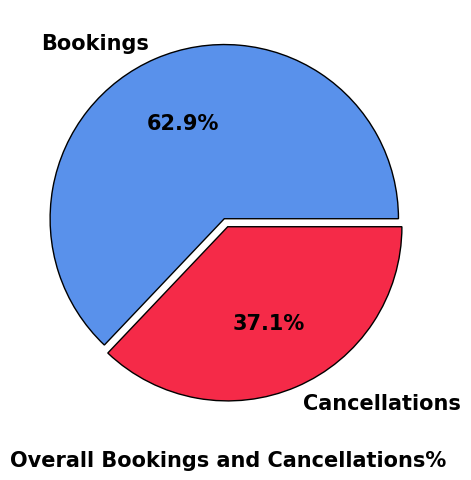

In [50]:
explode = (0.05, 0)
plt.figure(figsize=(14, 5))
colors= ['#5991eb', '#f52a48']
ax=plt.pie(data=df2, x=df2.is_canceled.value_counts().values ,
            labels = ['Bookings', 'Cancellations'], colors = colors
            , autopct='%.1f%%', explode=explode,
            wedgeprops = {"edgecolor" : "black",},
          textprops={'fontsize':15, 'weight':'bold'})

plt.xlabel('Overall Bookings and Cancellations%',fontsize=15,weight='bold')
plt.rcParams['font.size'] = 13.0
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.show()

In [51]:
df2.country.value_counts()[:5].to_frame()

,country
PRT,48980
GBR,12120
FRA,10402
ESP,8560
DEU,7285


In [52]:
country_df = df2.country.value_counts()[:15].to_frame()
countries_count=country_df.country.values
countries_name=country_df.index.values

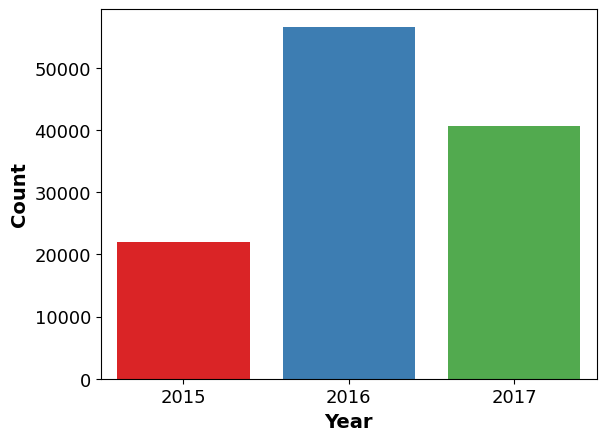

In [53]:
ax = sns.countplot(x='arrival_date_year', data=df2, saturation=0.9, palette='Set1')
plt.xlabel('Year',fontsize=14,weight='bold')
plt.ylabel('Count',fontsize=14,weight='bold')
plt.xticks()
plt.yticks()
plt.show()

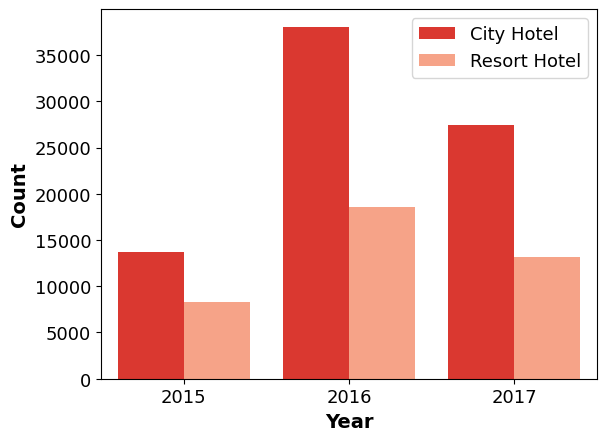

In [54]:
ax = sns.countplot(x='arrival_date_year', data=df2, hue='hotel', saturation=0.9, palette='Reds_r')
plt.xlabel('Year',fontsize=14,weight='bold')
plt.ylabel('Count',fontsize=14,weight='bold')
plt.xticks()
plt.yticks()
plt.legend(loc='upper right',)
plt.show()

In [55]:
df2.arrival_date_month.value_counts().reset_index()

,index,arrival_date_month
0,August,13859
1,July,12649
2,May,11780
3,October,11147
4,April,11084
5,June,10930
6,September,10501
7,March,9768
8,February,8055
9,November,6773


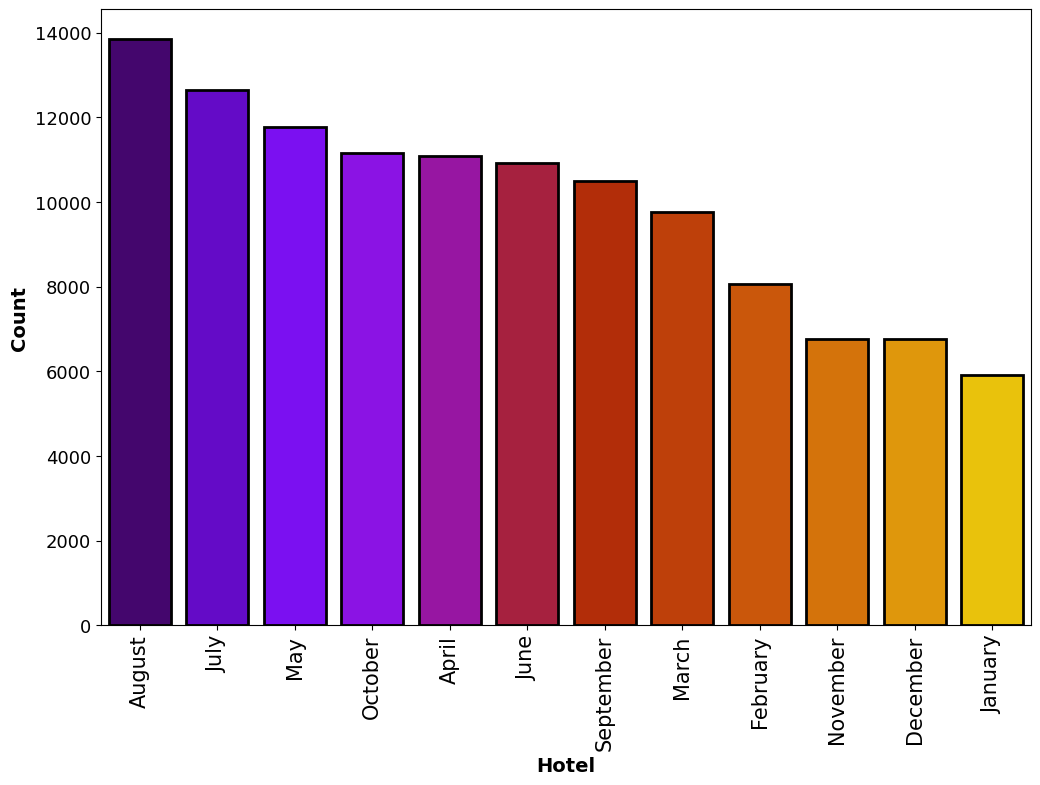

In [56]:
plt.figure(figsize=(12, 8))
month_order=df2.arrival_date_month.value_counts().index
ax = sns.countplot(x='arrival_date_month', data=df2, order=month_order, saturation=0.9, palette='gnuplot', lw=2,ec='black')
plt.xlabel('Hotel',fontsize=14,weight='bold')
plt.ylabel('Count',fontsize=14,weight='bold')
plt.xticks(rotation=90, fontsize=15)
plt.yticks()
plt.show()

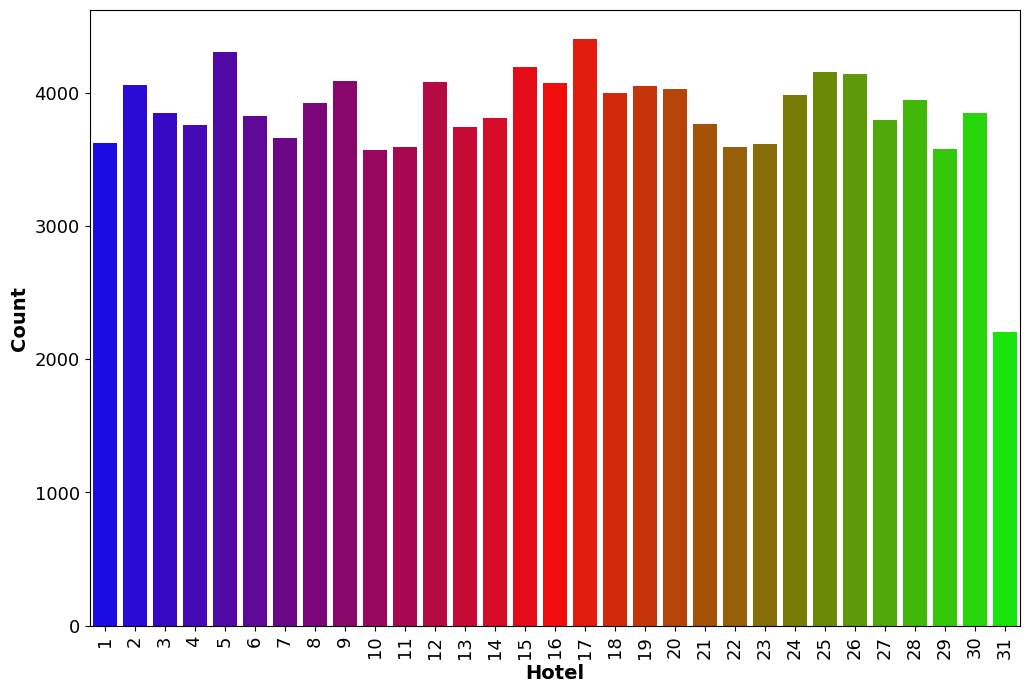

In [57]:
plt.figure(figsize=(12, 8))
day_order=df2.arrival_date_day_of_month.value_counts().index
ax = sns.countplot(x='arrival_date_day_of_month', data=df2, saturation=0.9, palette='brg',)
plt.xlabel('Hotel',fontsize=14,weight='bold')
plt.ylabel('Count',fontsize=14,weight='bold')
plt.xticks(rotation=90)
plt.yticks()
plt.show()

In [58]:
df2.stays_in_weekend_nights.value_counts()

0     51909
2     33273
1     30614
4      1847
3      1252
6       152
5        77
8        58
7        19
9        10
10        7
12        5
13        2
16        2
18        1
19        1
14        1
Name: stays_in_weekend_nights, dtype: int64

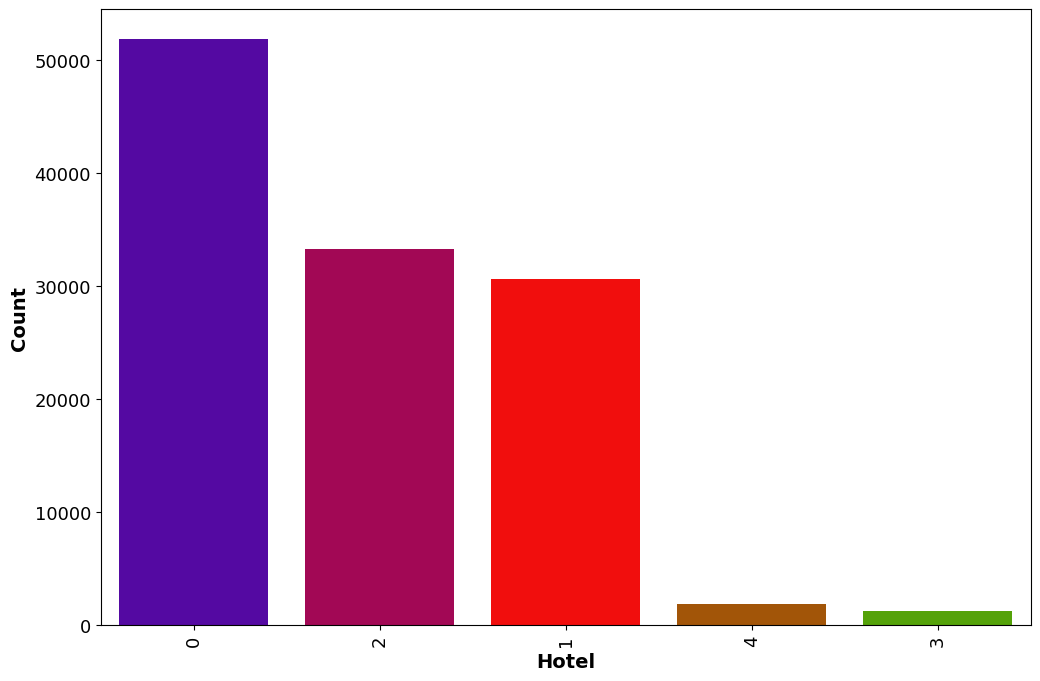

In [59]:
plt.figure(figsize=(12, 8))
stay_order=df2.stays_in_weekend_nights.value_counts().index[:5]
ax = sns.countplot(x='stays_in_weekend_nights', data=df2, order=stay_order,saturation=0.9, palette='brg',)
plt.xlabel('Hotel',fontsize=14,weight='bold')
plt.ylabel('Count',fontsize=14,weight='bold')
plt.xticks(rotation=90)
plt.yticks()
plt.show()

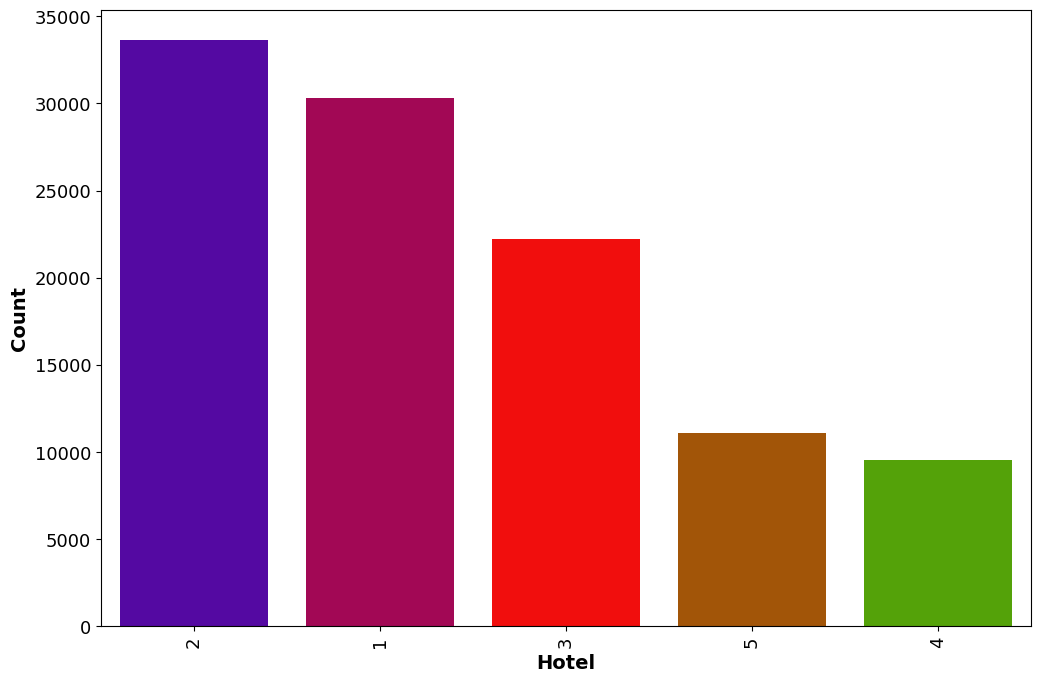

In [60]:
plt.figure(figsize=(12, 8))
stay_order=df2.stays_in_week_nights.value_counts().index[:5]
ax = sns.countplot(x='stays_in_week_nights', data=df2, order=stay_order,saturation=0.9, palette='brg',)
plt.xlabel('Hotel',fontsize=14,weight='bold')
plt.ylabel('Count',fontsize=14,weight='bold')
plt.xticks(rotation=90)
plt.yticks()
plt.show()

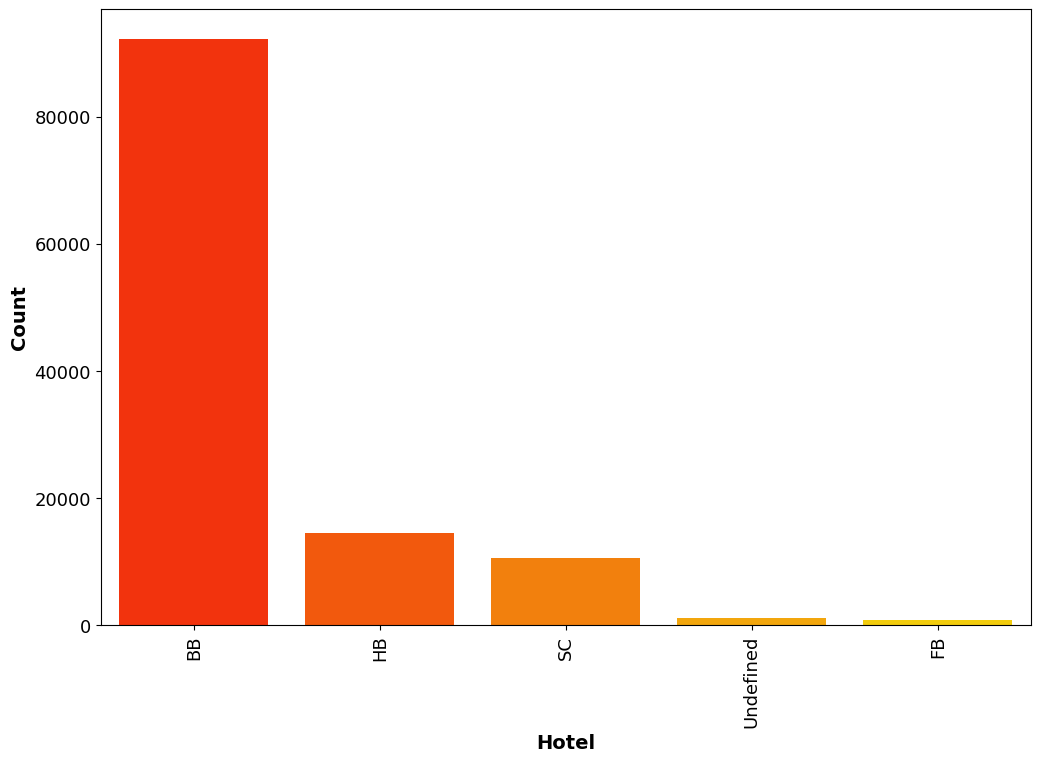

In [61]:
plt.figure(figsize=(12, 8))
stay_order=df2.meal.value_counts().index
ax = sns.countplot(x='meal', data=df2, order=stay_order,saturation=0.9, palette='autumn',)
plt.xlabel('Hotel',fontsize=14,weight='bold')
plt.ylabel('Count',fontsize=14,weight='bold')
plt.xticks(rotation=90)
plt.yticks()
plt.show()

In [62]:
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

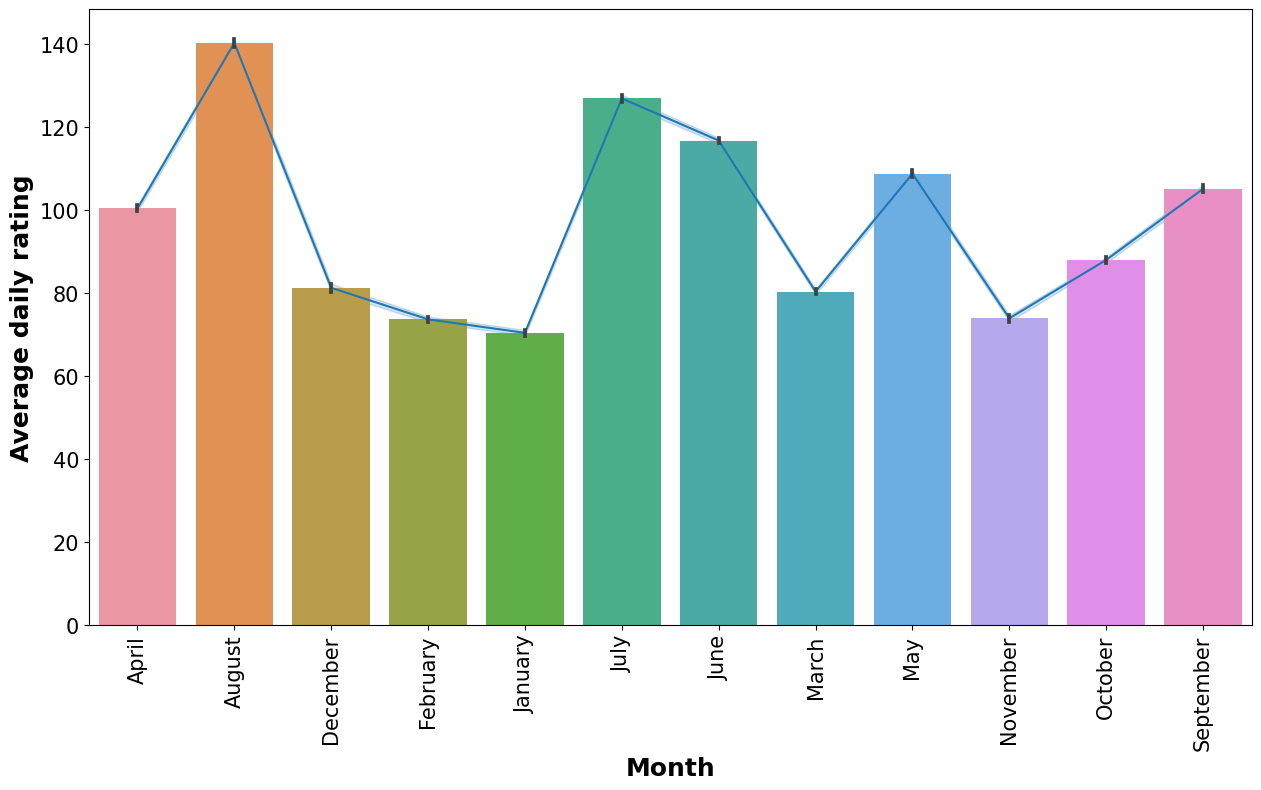

In [63]:
plt.figure(figsize=(15, 8))
ax = sns.lineplot(x='arrival_date_month', y='adr', data=df2,)
ax = sns.barplot(x='arrival_date_month', y='adr', data=df2,)
plt.xlabel('Month',fontsize=18,weight='bold')
plt.ylabel('Average daily rating',fontsize=18,weight='bold')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Average daily rating is low in the starting and the ending 3 months overall.
In the mid of the year, from April to Sep, hotels maintain the average daily rating to 100. Several discounts or offers may be introd....

### Average Daily Rating According to Month and Hotel

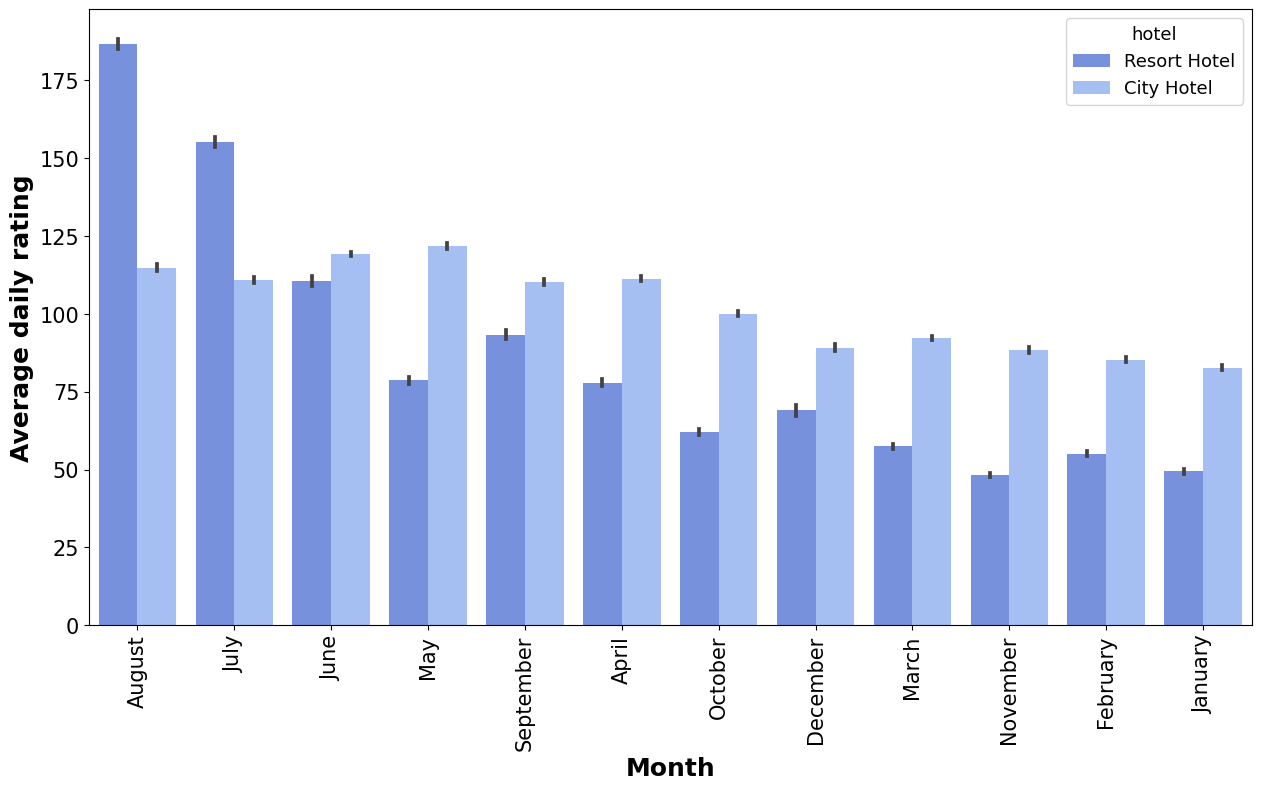

In [64]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='arrival_date_month', y='adr', hue='hotel', data=df2,
                 color=sns.set_palette('coolwarm'),
                order=df2.groupby('arrival_date_month')['adr'].mean().sort_values(ascending=False).index,
                hue_order=['Resort Hotel', 'City Hotel'])
plt.xlabel('Month',fontsize=18,weight='bold')
plt.ylabel('Average daily rating',fontsize=18,weight='bold')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Most bookings are in the mid of summer. The least in the starting of the year.

### Is Average Daily Rating improving over years?

In [65]:
df2.arrival_date_year.value_counts()

2016    56636
2017    40630
2015    21964
Name: arrival_date_year, dtype: int64

In [66]:
df2.arrival_date_year.dtype

dtype('int64')

In [67]:
df_2015=df2[(df2.arrival_date_year==2015) & (df2.adr > 0)]
df_2016=df2[(df2.arrival_date_year==2016) & (df2.adr > 0)]
df_2017=df2[(df2.arrival_date_year==2017)& (df2.adr > 0)]

In [68]:
df_2015['arrival_date_month'].value_counts()

September    5009
October      4824
August       3790
December     2795
July         2714
November     2273
April           0
February        0
January         0
June            0
March           0
May             0
Name: arrival_date_month, dtype: int64

In [69]:
df_2015['arrival_date_month'].cat.remove_unused_categories().value_counts()

September    5009
October      4824
August       3790
December     2795
July         2714
November     2273
Name: arrival_date_month, dtype: int64

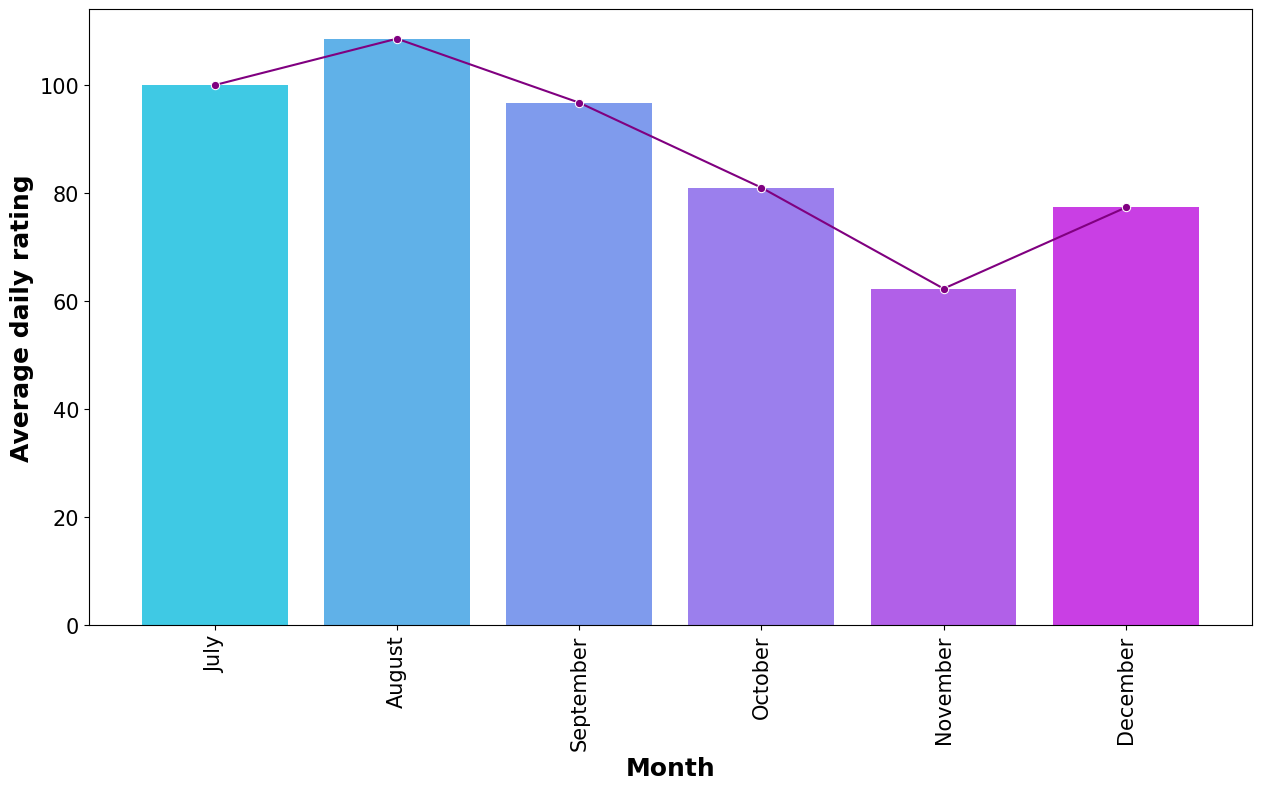

In [70]:
plt.figure(figsize=(15, 8))

x_val = df_2015.groupby('arrival_date_month')['adr'].mean().dropna().index.to_list()
order=[2,0,5,4,3,1]
x_val = [x_val[i] for i in order]
y_val = df_2015.groupby('arrival_date_month')['adr'].mean().dropna().values
y_val = [y_val[i] for i in order]

ax = sns.barplot(x=x_val, y=y_val, palette='cool')
ax = sns.lineplot(x=x_val, y=y_val, marker="o", color='purple')

plt.xlabel('Month',fontsize=18,weight='bold')
plt.ylabel('Average daily rating',fontsize=18,weight='bold')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [71]:
df_2015.groupby('arrival_date_month')['adr'].mean().dropna()

arrival_date_month
August       108.658472
December      77.392268
July         100.066345
November      62.363304
October       81.070612
September     96.806277
Name: adr, dtype: float64

In [72]:
print(df_2016.groupby('arrival_date_month')['adr'].mean().dropna().index.to_list())

['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']


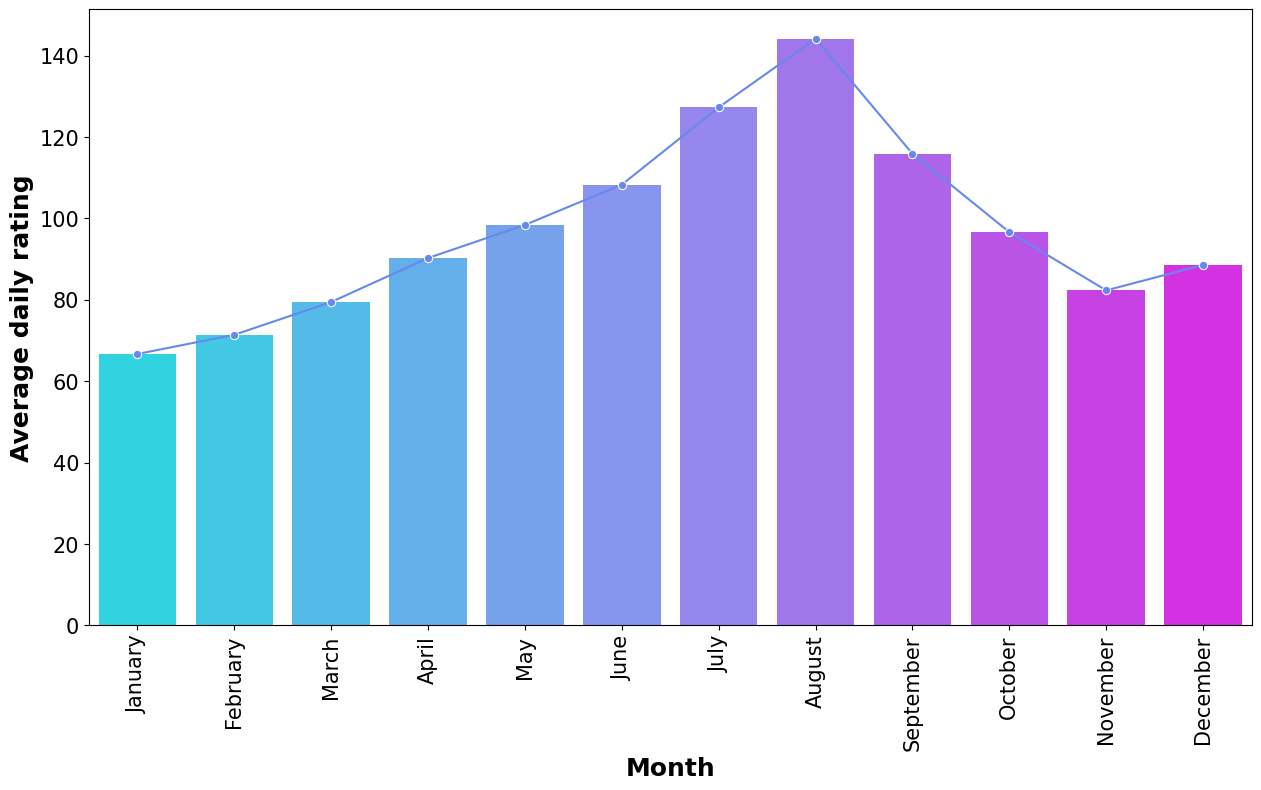

In [73]:
plt.figure(figsize=(15, 8))

x_val = df_2016.groupby('arrival_date_month')['adr'].mean().dropna().index.to_list()
order = [4,3,7,0,8,6,5,1,11,10,9,2]
x_val = [x_val[i] for i in order]
y_val = df_2016.groupby('arrival_date_month')['adr'].mean().dropna().values
y_val = [y_val[i] for i in order]

ax = sns.lineplot(x=x_val, y=y_val, marker='o')
ax = sns.barplot(x=x_val, y=y_val, palette='cool')

plt.xlabel('Month',fontsize=18,weight='bold')
plt.ylabel('Average daily rating',fontsize=18,weight='bold')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [74]:
df_2016.groupby('arrival_date_month')['adr'].mean()

arrival_date_month
April         90.274170
August       144.182899
December      88.583306
February      71.409180
January       66.696148
July         127.305320
June         108.307624
March         79.469618
May           98.410727
November      82.318897
October       96.638568
September    115.905225
Name: adr, dtype: float64

In [75]:
print(df_2017.groupby('arrival_date_month')['adr'].mean().dropna().index.to_list())

['April', 'August', 'February', 'January', 'July', 'June', 'March', 'May']


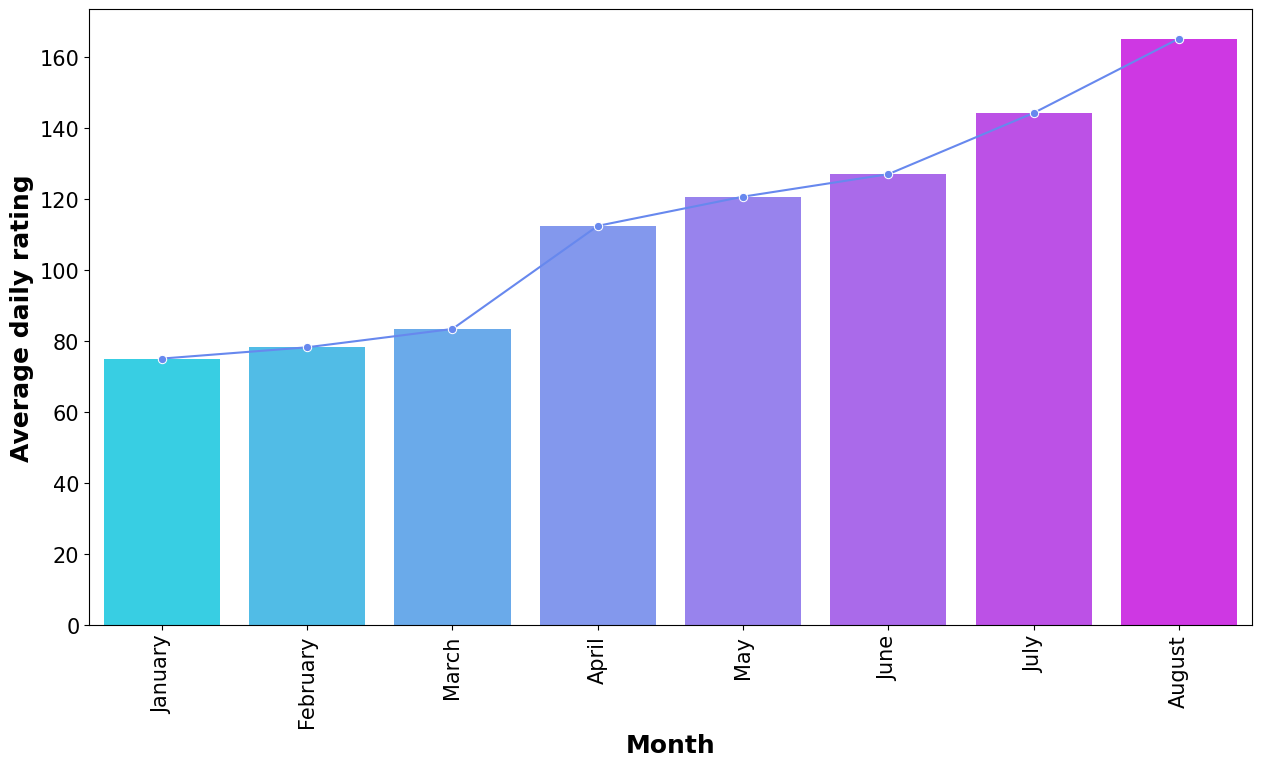

In [76]:
plt.figure(figsize=(15, 8))

x_val = df_2017.groupby('arrival_date_month')['adr'].mean().dropna().index.to_list()
order=[3,2,6,0,7,5,4,1]
x_val = [x_val[i] for i in order]
y_val = df_2017.groupby('arrival_date_month')['adr'].mean().dropna().values
y_val = [y_val[i] for i in order]

ax = sns.lineplot(x=x_val, y=y_val, marker='o')
ax = sns.barplot(x=x_val, y=y_val, palette='cool')

plt.xlabel('Month',fontsize=18,weight='bold')
plt.ylabel('Average daily rating',fontsize=18,weight='bold')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [77]:
df_2017.groupby('arrival_date_month')['adr'].mean().dropna()

arrival_date_month
April       112.443496
August      165.187507
February     78.258063
January      75.075040
July        144.241270
June        127.005789
March        83.416412
May         120.670117
Name: adr, dtype: float64

In [78]:
df_2015['adr'].mean()

89.57935622518103

In [79]:
df_2016['adr'].mean()

99.86972870232566

In [80]:
df_2017['adr'].mean()

115.94998359066159

Yes, Average daily rating is improving yearly.
In 2015 and 2016, it is almost 90 and 100 respectively, while in 2017 it is nearly 120.
The highest bookings are in the month of August and it's growing averge daily rating can also be seen in the above graphs over years.
The bookings count goes down after August and again start increasing from December.
The first 6 months data from 2015 and last 4 months from 2017 isn't available. Otherwise result might be better.

In [81]:
df2[df2.arrival_date_year==2017]['arrival_date_month'].value_counts()

May          6305
April        5658
June         5640
July         5310
March        4949
August       4925
February     4169
January      3674
December        0
November        0
October         0
September       0
Name: arrival_date_month, dtype: int64

Is Desposit_type having any effect on Cancellations?

In [82]:
df2.groupby('deposit_type')['is_canceled'].agg("count")

deposit_type
No Deposit    104481
Non Refund     14587
Refundable       162
Name: is_canceled, dtype: int64

In [83]:
pd.crosstab(df2['is_canceled'], df2['deposit_type'], normalize=True, )*100

deposit_type,No Deposit,Non Refund,Refundable
is_canceled,,,
0,62.728340,0.078001,0.105678
1,24.901451,12.156336,0.030194


It can be clearly seen for the Non Refund deposit type. Cancellations are high for this type.
